In [67]:
%matplotlib inline

In [8]:
import os

In [9]:
os.path

<module 'ntpath' from 'C:\Users\Lamuel\AppData\Local\Enthought\Canopy\App\appdata\canopy-1.7.4.3348.win-x86_64\lib\ntpath.pyc'>

In [10]:
path='C:\Users\Lamuel\projects\pydata-book\ch02\usagov_bitly_data2012-03-16-1331923249.txt'

In [23]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [24]:
import json

In [25]:
records = [json.loads(line) for line in open(path, 'rb')]

In [27]:
records[2]

{u'a': u'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoPath.3)',
 u'al': u'en-US',
 u'c': u'US',
 u'cy': u'Washington',
 u'g': u'xxr3Qb',
 u'gr': u'DC',
 u'h': u'xxr3Qb',
 u'hc': 1331919941,
 u'hh': u'1.usa.gov',
 u'l': u'bitly',
 u'll': [38.9007, -77.043098],
 u'nk': 1,
 u'r': u'http://t.co/03elZC4Q',
 u't': 1331923250,
 u'tz': u'America/New_York',
 u'u': u'http://boxer.senate.gov/en/press/releases/031612.cfm'}

In [15]:
records[0]['tz']

u'America/New_York'

In [16]:
print records[0]['tz']

America/New_York


In [17]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [18]:
time_zones[1:10
        ]

[u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [19]:
time_zones.count('America/New_York')

1251

In [20]:
counts = defaultdict(int)

NameError: name 'defaultdict' is not defined

In [ ]:
from collections import defaultdict

In [ ]:
counts = defaultdict(int)

In [ ]:
def get_counts(seq):
    counts = defaultdict(int)
    for x in seq:
        counts[x] += 1
    return counts

In [ ]:
counts = get_counts(time_zones)

In [ ]:
counts

In [ ]:
len(counts)

In [ ]:
len(time_zones)

In [ ]:
def top_counts(count_dict, n=10):
    val_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    val_key_pairs.sort()
    return val_key_pairs[-n:]

In [ ]:
top_counts(counts)

In [ ]:
from collections import Counter

In [ ]:
counts = Counter(counts)

In [ ]:
counts

In [ ]:
counts.most_common(10)

In [28]:
from pandas import DataFrame, Series

In [29]:
import pandas as pd

In [30]:
frame = DataFrame(records)

In [31]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [32]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [33]:
tz_counts = frame['tz'].value_counts()

In [34]:
tz_counts

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Helsinki                     10
Asia/Hong_Kong                      10
America/Puerto_Rico      

In [35]:
clean_tz = frame['tz'].fillna('Missing')

In [36]:
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [37]:
clean_tz[clean_tz==''] = 'Unknown'

In [38]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [39]:
clean_tz[clean_tz=='Missing']

13      Missing
55      Missing
92      Missing
135     Missing
163     Missing
193     Missing
226     Missing
261     Missing
295     Missing
327     Missing
357     Missing
392     Missing
419     Missing
453     Missing
501     Missing
534     Missing
570     Missing
609     Missing
632     Missing
661     Missing
694     Missing
737     Missing
756     Missing
781     Missing
829     Missing
880     Missing
920     Missing
958     Missing
997     Missing
1034    Missing
         ...   
2844    Missing
2873    Missing
2907    Missing
2938    Missing
2965    Missing
2995    Missing
3022    Missing
3036    Missing
3068    Missing
3083    Missing
3103    Missing
3124    Missing
3144    Missing
3172    Missing
3206    Missing
3229    Missing
3251    Missing
3281    Missing
3304    Missing
3332    Missing
3348    Missing
3371    Missing
3390    Missing
3415    Missing
3433    Missing
3451    Missing
3467    Missing
3499    Missing
3518    Missing
3543    Missing
Name: tz, dtype: object

In [40]:
tz_counts = clean_tz.value_counts()

In [41]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

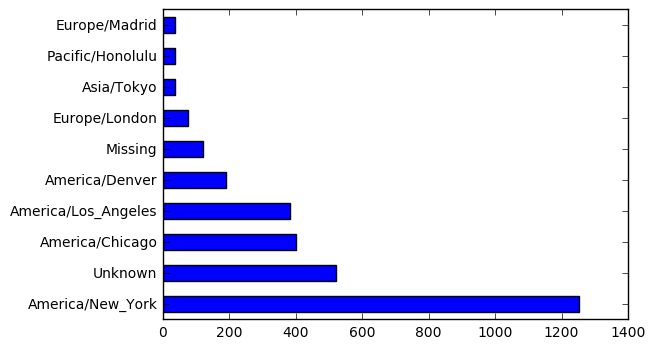

In [42]:
tz_counts[:10].plot(kind='barh', rot=0)

In [45]:
frame['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [46]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [47]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [49]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [50]:
frame.tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [52]:
cframe = frame[frame.a.notnull()]

In [54]:
import numpy as np

In [55]:
oss = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [56]:
by_tz_oss = cframe.groupby(['tz', oss])

In [57]:
agg_counts = by_tz_oss.size().unstack().fillna(0)

In [58]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [59]:
indexer = agg_counts.sum(1).argsort()

In [60]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [64]:
count_subset = agg_counts.take(indexer)[-10:]

In [65]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


<IPython.core.display.Javascript object>


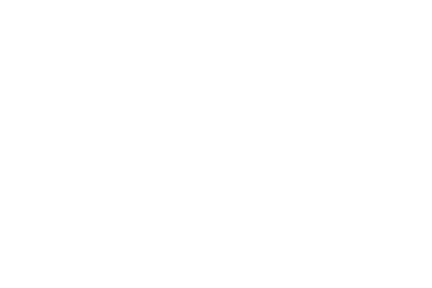

<IPython.core.display.Javascript object>


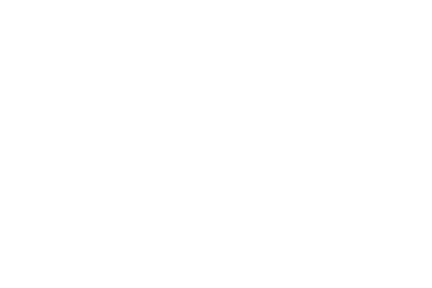

In [66]:
count_subset.plot(kind='barh', stacked=True)

In [68]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

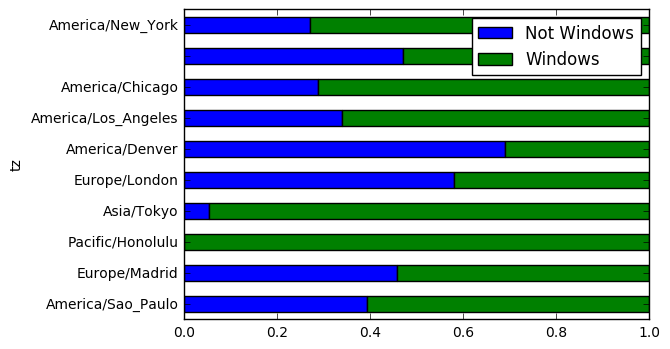

In [69]:
normed_subset.plot(kind='barh', stacked=True)